# Assignment 10- Model Building

This assignment goes through the model building process using various packages such as "caret", "rattle", and "rpart".

### 2. Import data set

In [1]:
setwd("~/Data Analysis Practice Data Sets")
getwd()
adult <- read.csv("adult_data.csv", header = FALSE, na.strings = " ?")

[1] "C:/Users/student/Documents/Data Analysis Practice Data Sets"

### 3. Change names of variables

In [2]:
names(adult) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation",
                  "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week",
                  "native_country", "class")

### 4. Identify all the missing values.  Notice that missing values can be in the form of "NA", "?", "." and so on  

In [3]:
sum(is.na(adult))
colSums(is.na(adult))

[1] 4262

age      workclass         fnlwgt      education  education_num 
             0           1836              0              0              0 
marital_status     occupation   relationship           race            sex 
             0           1843              0              0              0 
  capital_gain   capital_loss hours_per_week native_country          class 
             0              0              0            583              0

### 5. Replacing numeric missing values by the mean of the corresponding variables, and categorical missing values by the mode of the corresponding variables. 

In [4]:
most_frequent <- function(x){
   unique_x <- unique(x)
   unique_x[which.max(tabulate(match(x, unique_x)))]
}

for (i in which(sapply(adult, is.numeric))){
    adult[is.na(adult[,i]), i] <- mean(adult[,i], na.rm = TRUE)
} 

for (i in which(sapply(adult, is.factor))){
    adult[is.na(adult[,i]), i] <- most_frequent(adult[,i])
}

head(adult)
sum(is.na(adult))

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


[1] 0

### 6. Perform data visualization on the data. 

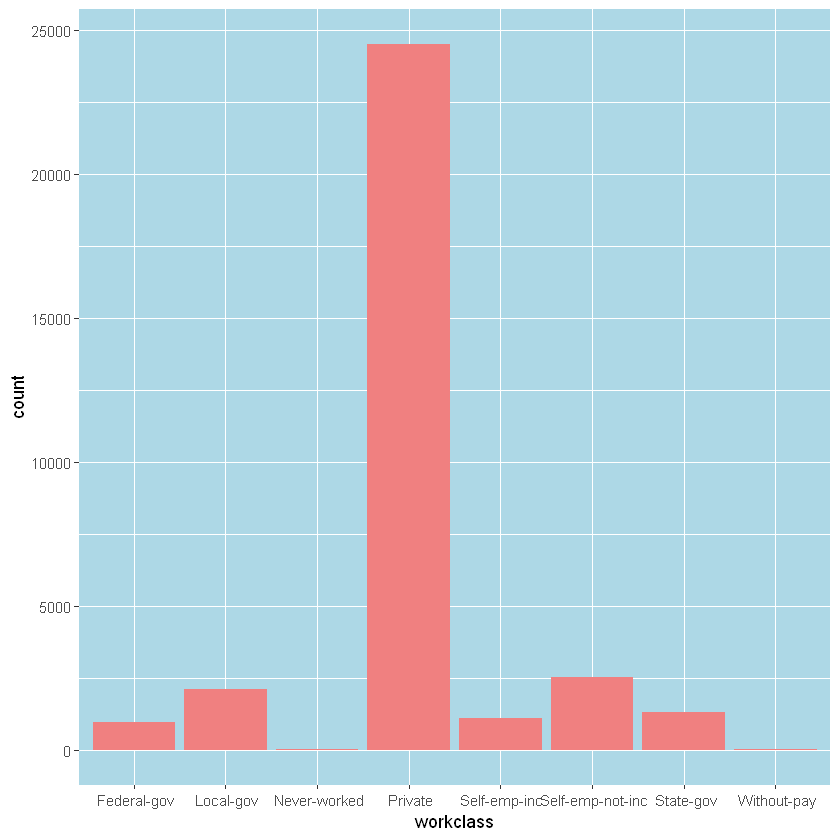

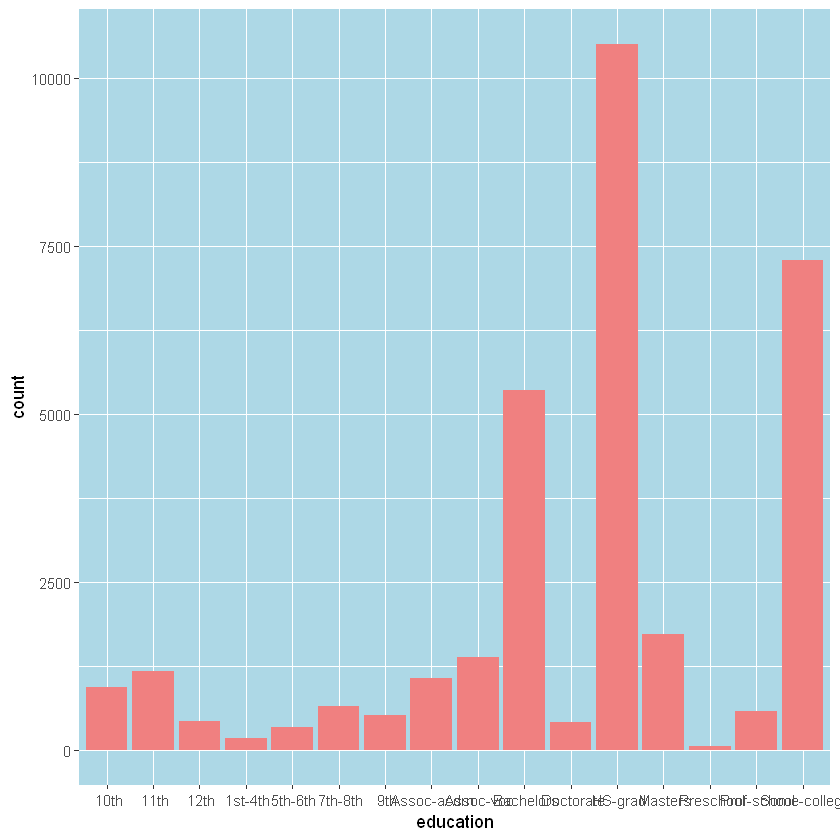

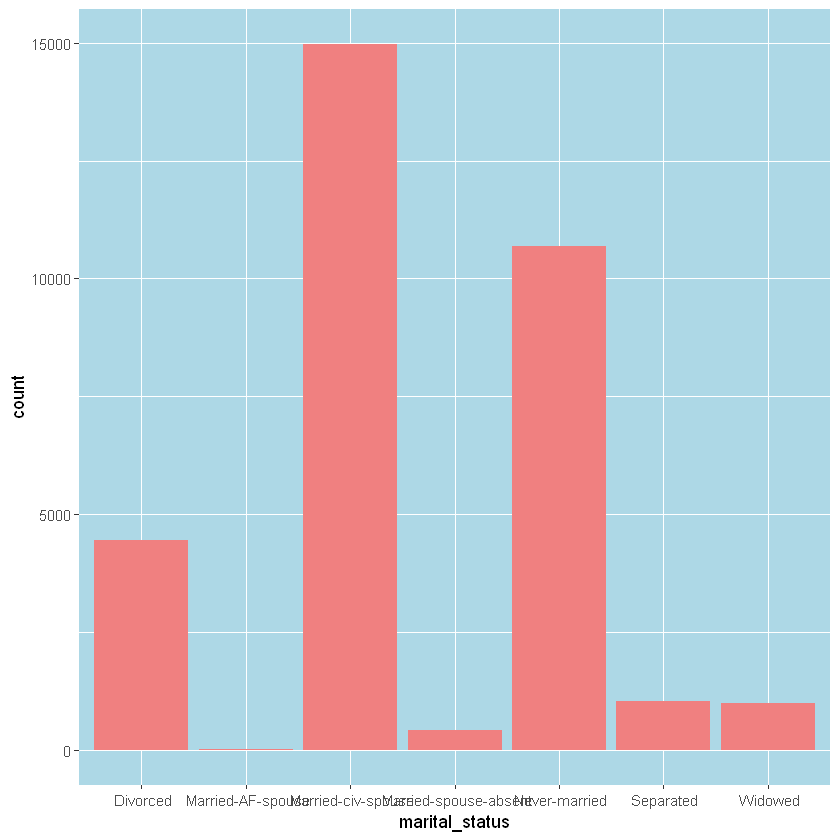

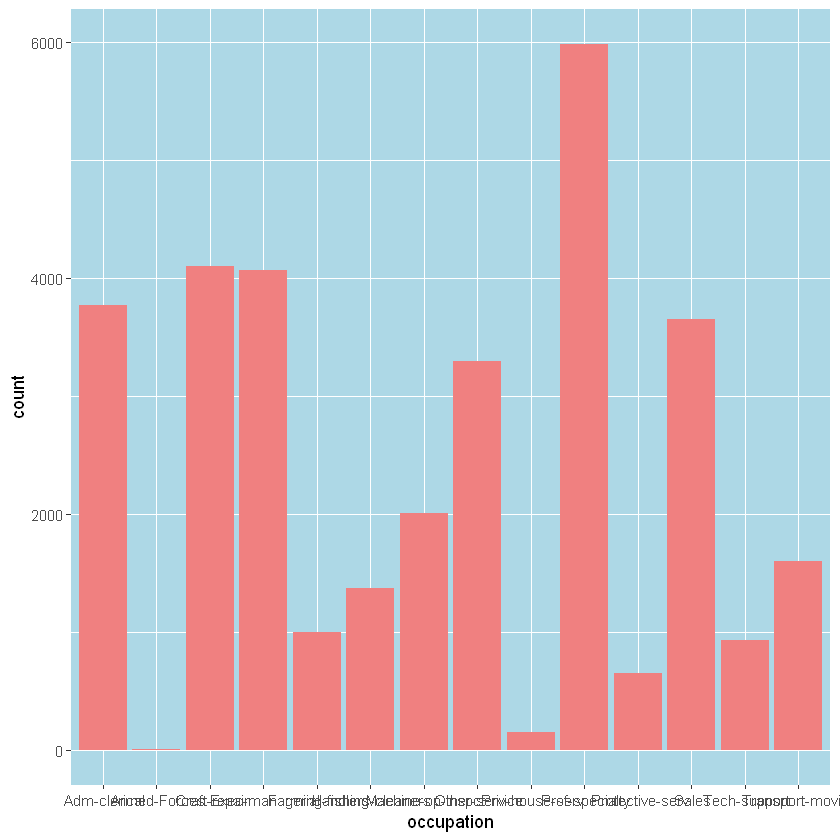

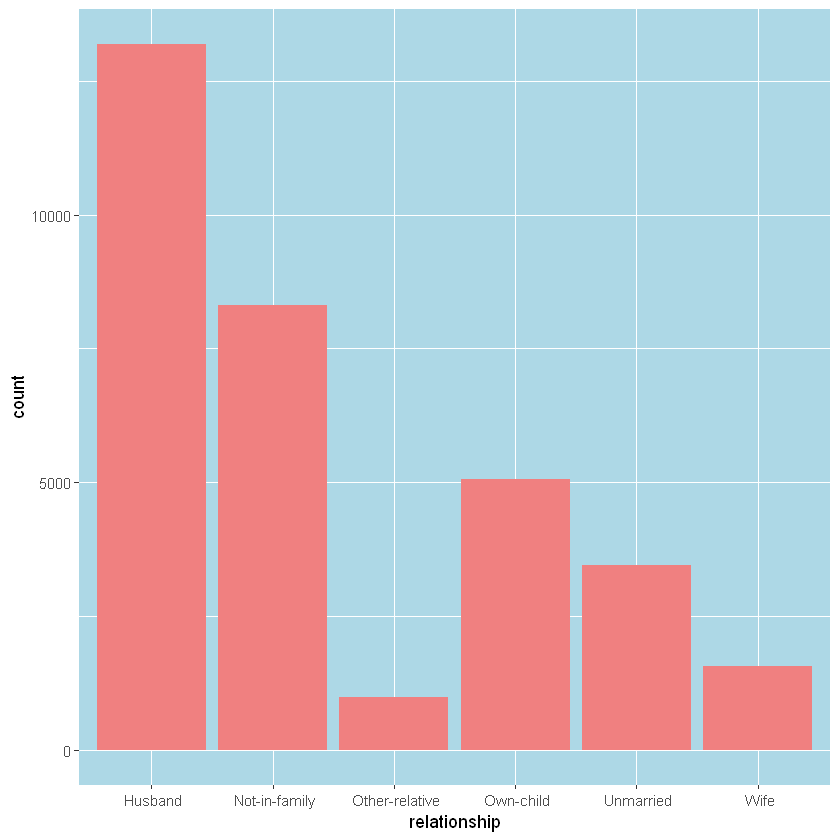

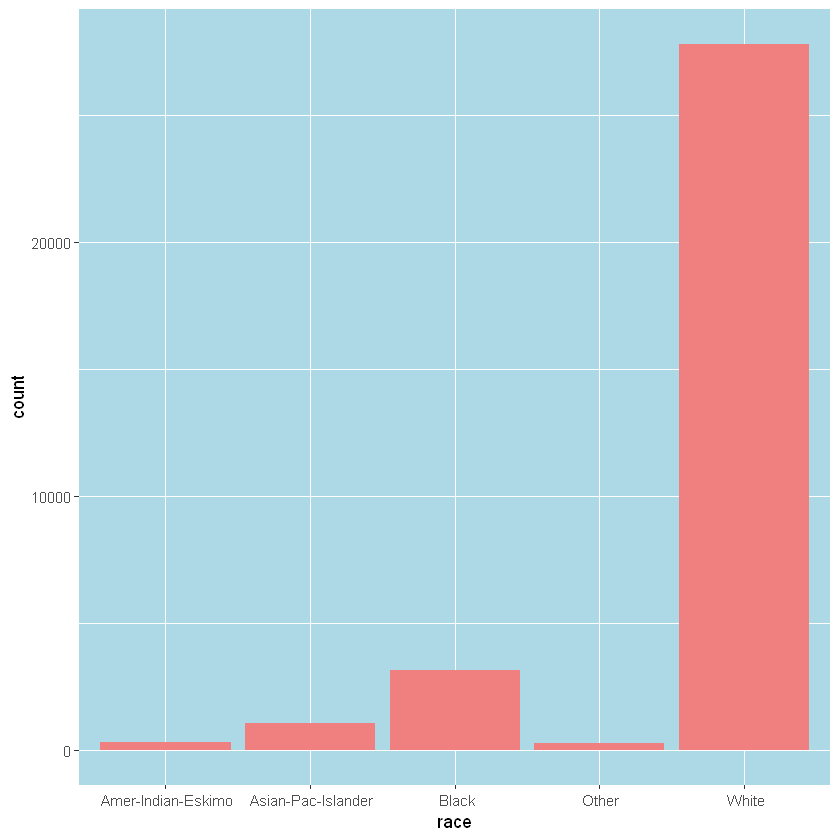

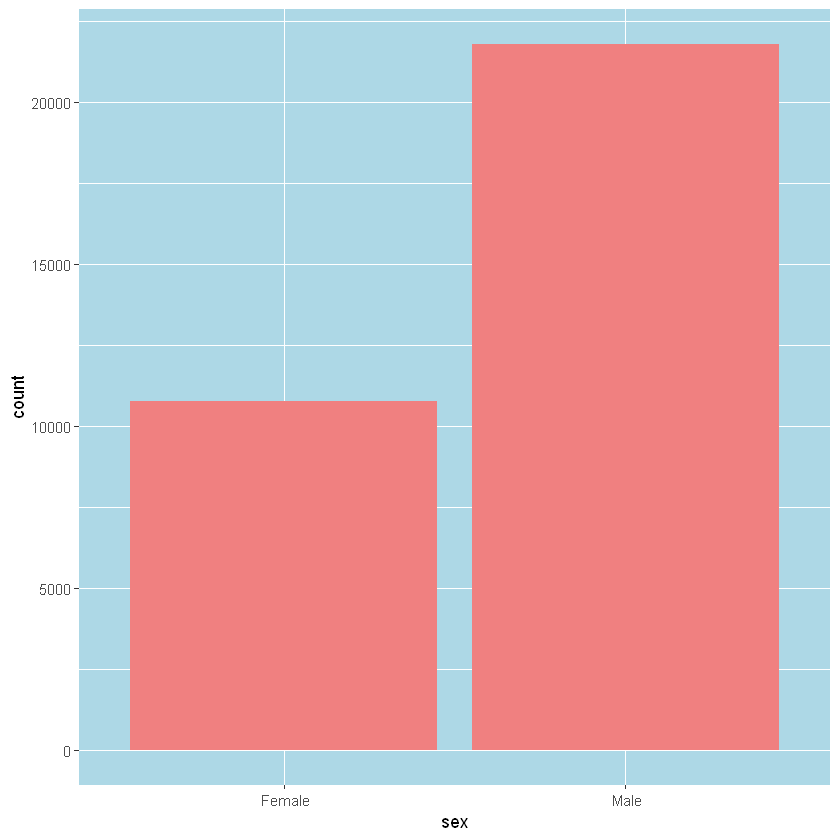

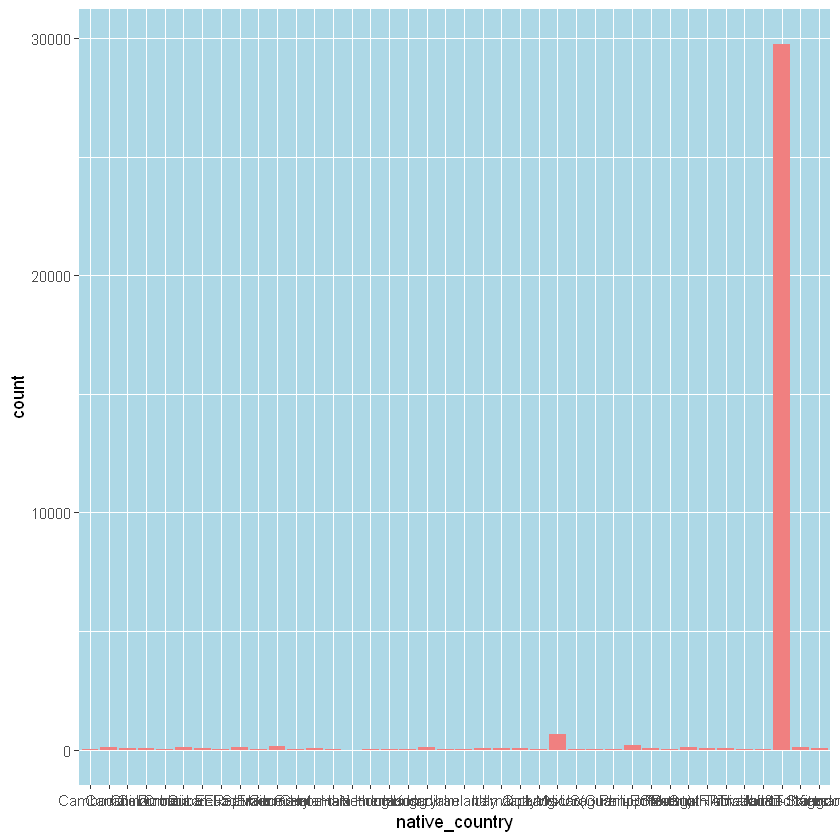

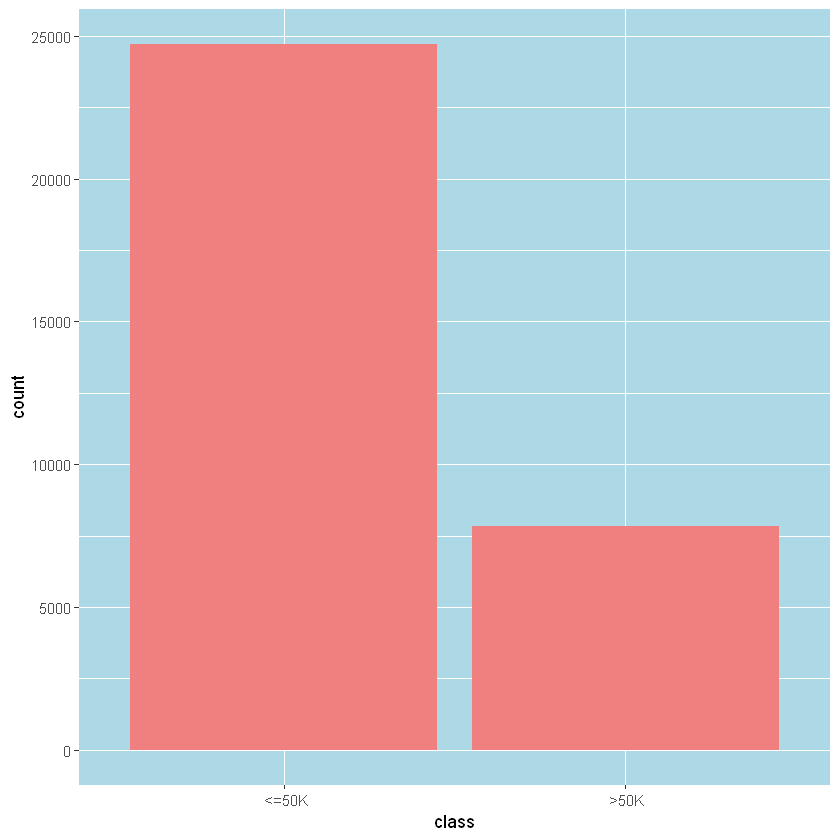

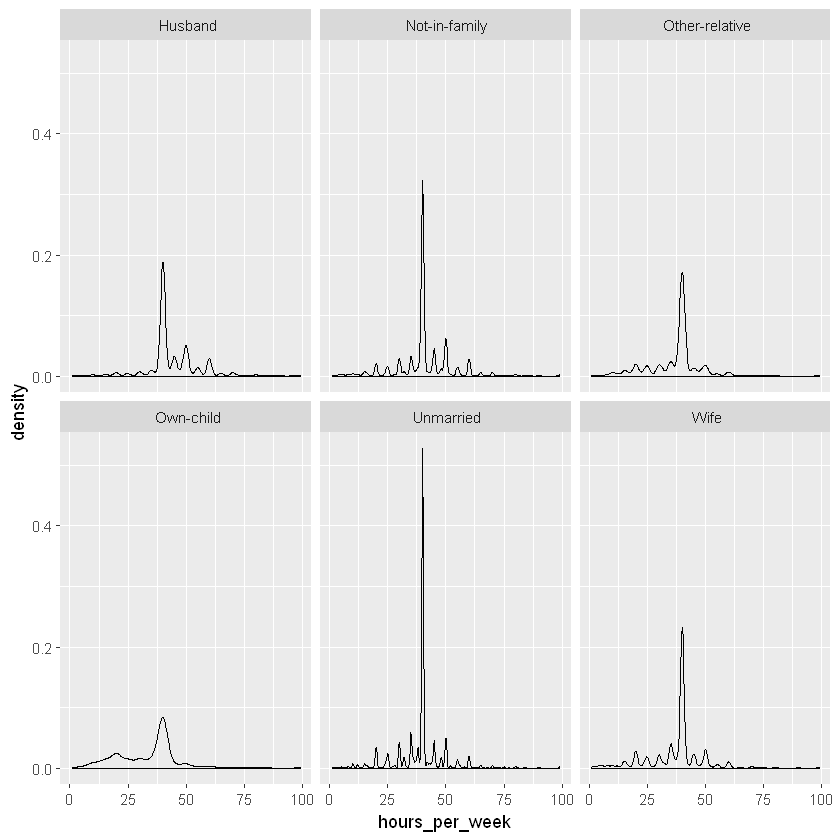

In [5]:
bar_charts <- function(data)
{
  library(ggplot2)
  columns <- names(data)
  for (i in 1:ncol(data)){
    if (is.factor(data[[i]])){
      print(ggplot(data) +
          geom_bar(mapping = aes(x=data[,i]), fill = "lightcoral") +
          xlab(columns[i]) +
          theme(panel.background = element_rect(fill = "light blue")))
    }
  }
}

bar_charts(adult)

ggplot(adult) +
  geom_density(mapping = aes(x = hours_per_week)) +
  facet_wrap(~relationship)

### 7. Partition the data into training and testing data with ratio train : test = 60 : 40

In [6]:
library(caret)
split <- createDataPartition(adult$class, p = .6, list = FALSE, times = 1)
adult_train <- adult[split,]
adult_test <- adult[-split,]

Loading required package: lattice


### 8. Build a decision tree model on the training data and test the model on the testing data

In [7]:
library(rpart)
decision_tree <- rpart(class~., data = adult_train, method="class")

library(rattle)
predicting_test <- predict(decision_tree, adult_test, type = "class")

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


### 9. Report the misclassification rate and confusion table of the tree model

In [8]:
conf_matrix <- confusionMatrix(data = predicting_test, reference = adult_test$class)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   9398  1513
     >50K     490  1623
                                          
               Accuracy : 0.8462          
                 95% CI : (0.8399, 0.8524)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5266          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9504          
            Specificity : 0.5175          
         Pos Pred Value : 0.8613          
         Neg Pred Value : 0.7681          
             Prevalence : 0.7592          
         Detection Rate : 0.7216          
   Detection Prevalence : 0.8378          
      Balanced Accuracy : 0.7340          
                                          
       'Positive' Class :  <=50K          
                                          

### 10. Print out the tree

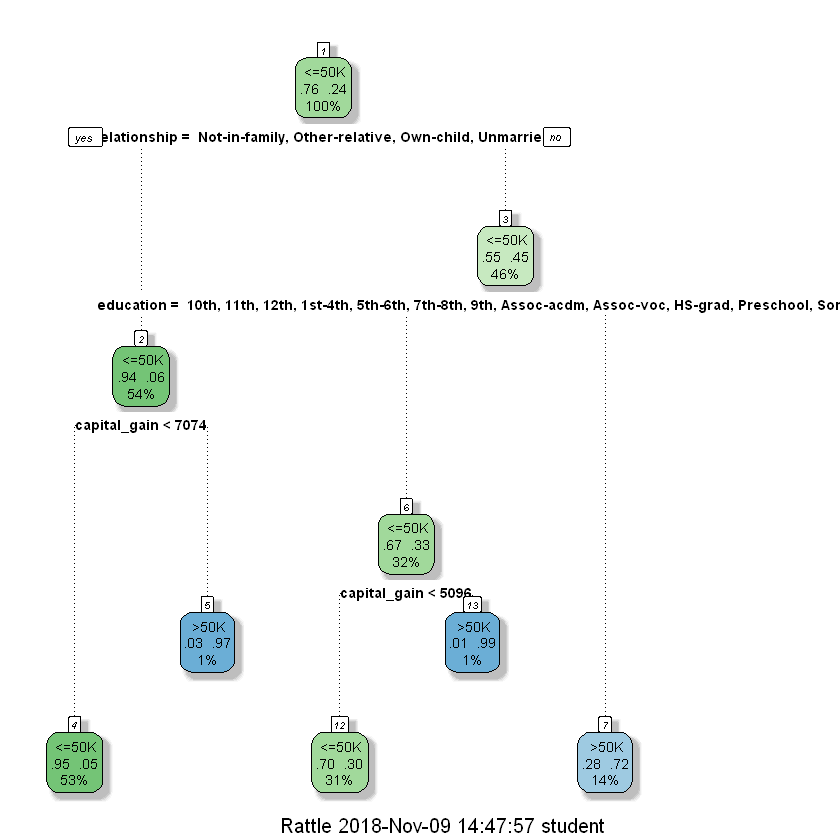

In [9]:
fancyRpartPlot(decision_tree)

### 11.	Build tree model using caret package and report the confusion table 

In [10]:
library(caret)
adult_model2 <- train(class~.,data=adult_train, method = "rpart")
adult_pred2 <- predict(adult_model2, adult_test)

conf_matrix2 <- confusionMatrix(adult_pred2, adult_test$class)
conf_matrix2

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   9391  1642
     >50K     497  1494
                                          
               Accuracy : 0.8358          
                 95% CI : (0.8293, 0.8421)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4868          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9497          
            Specificity : 0.4764          
         Pos Pred Value : 0.8512          
         Neg Pred Value : 0.7504          
             Prevalence : 0.7592          
         Detection Rate : 0.7211          
   Detection Prevalence : 0.8471          
      Balanced Accuracy : 0.7131          
                                          
       'Positive' Class :  <=50K          
                                          

### 12.	Write a function, taking the input of training data percentage, to automate 7-10.  Apply the function with training data = 70%; 80%; 90%

NULL


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   9398  1513
     >50K     490  1623
                                          
               Accuracy : 0.8462          
                 95% CI : (0.8399, 0.8524)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5266          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9504          
            Specificity : 0.5175          
         Pos Pred Value : 0.8613          
         Neg Pred Value : 0.7681          
             Prevalence : 0.7592          
         Detection Rate : 0.7216          
   Detection Prevalence : 0.8378          
      Balanced Accuracy : 0.7340          
                                          
       'Positive' Class :  <=50K          
                                          

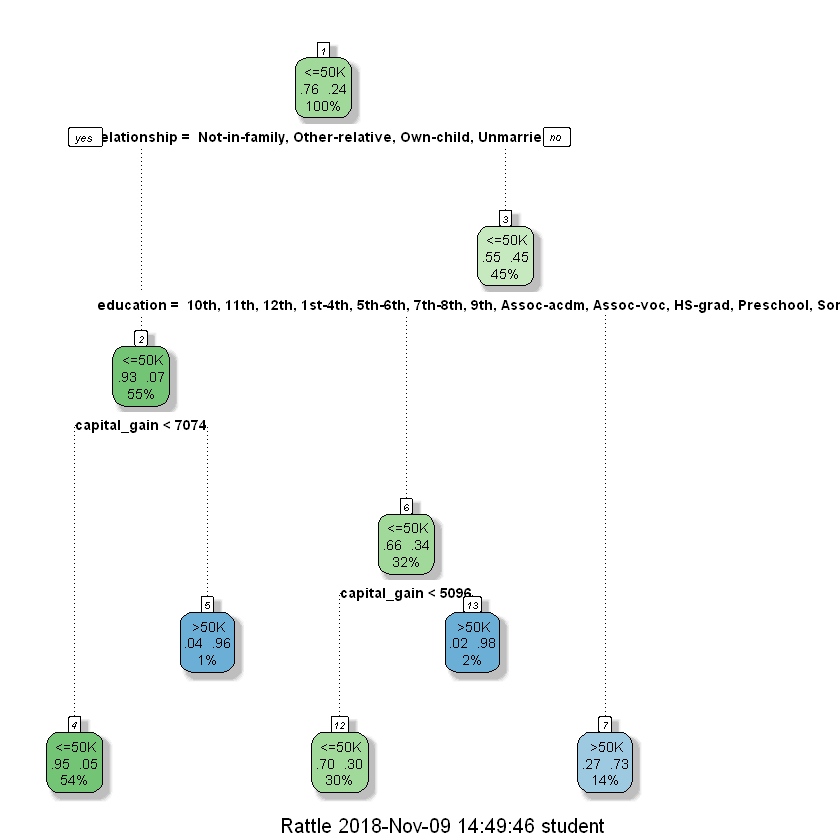

NULL


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   9398  1513
     >50K     490  1623
                                          
               Accuracy : 0.8462          
                 95% CI : (0.8399, 0.8524)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5266          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9504          
            Specificity : 0.5175          
         Pos Pred Value : 0.8613          
         Neg Pred Value : 0.7681          
             Prevalence : 0.7592          
         Detection Rate : 0.7216          
   Detection Prevalence : 0.8378          
      Balanced Accuracy : 0.7340          
                                          
       'Positive' Class :  <=50K          
                                          

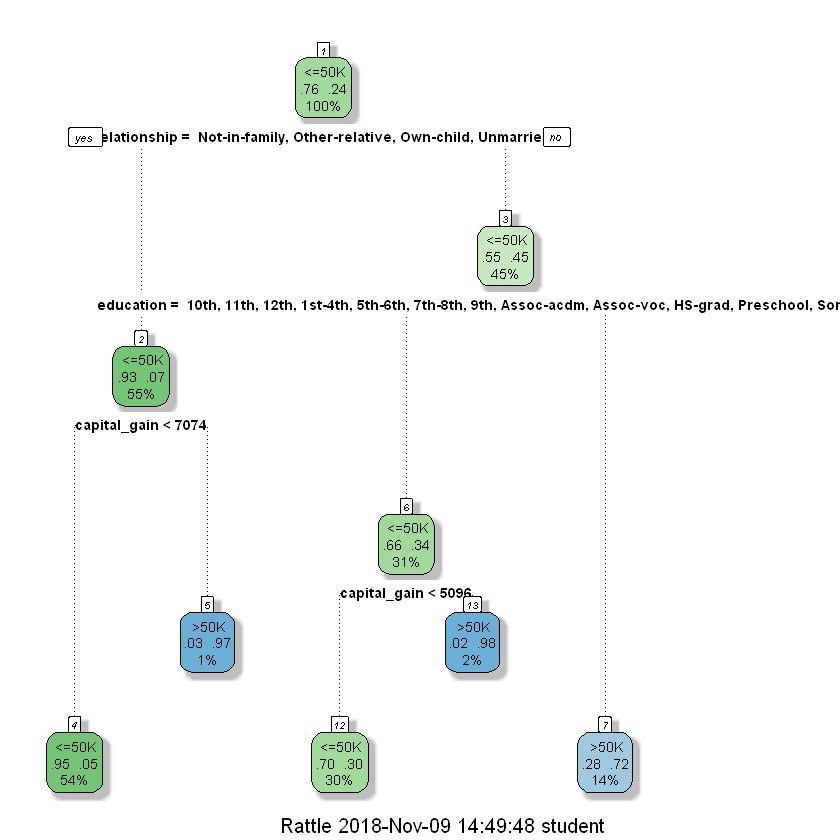

NULL


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   9398  1513
     >50K     490  1623
                                          
               Accuracy : 0.8462          
                 95% CI : (0.8399, 0.8524)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5266          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9504          
            Specificity : 0.5175          
         Pos Pred Value : 0.8613          
         Neg Pred Value : 0.7681          
             Prevalence : 0.7592          
         Detection Rate : 0.7216          
   Detection Prevalence : 0.8378          
      Balanced Accuracy : 0.7340          
                                          
       'Positive' Class :  <=50K          
                                          

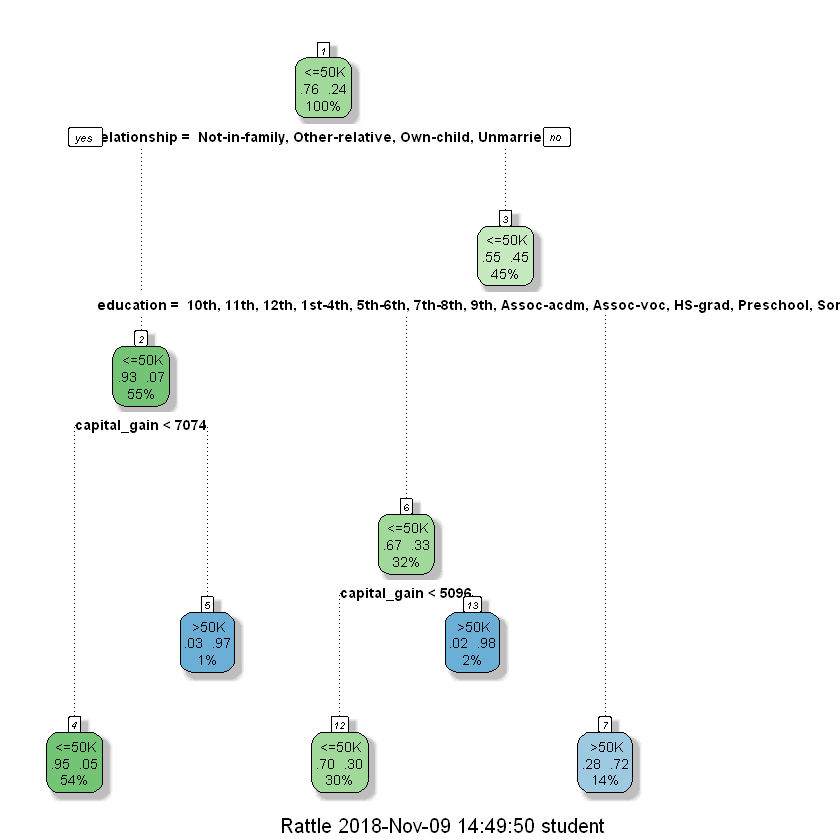

In [12]:
tree_model <- function(df, target, partition)
{
   if ((is.data.frame(df) & (target %in% colnames(df)) & is.numeric(partition) & (partition < 1) & (partition > 0))){
    
    library(caret)
    library(rattle)
    library(rpart)
    
    #partition data
    df_split <- createDataPartition(df[[target]], p = partition, list = FALSE, times = 1)
    df_train <- df[df_split,]
    df_test <- df[-df_split,] 
    
    #create decision tree
    tree <- rpart(class~., data = df_train, method="class")
    
  
    #use tre to predict testing data
    prediction <- predict(decision_tree, df_test, type = "class")
    
    
    #confusion matrix
    cm <- confusionMatrix(data = predicting_test, reference = adult_test$class)
    
    
    #plot
    print(fancyRpartPlot(tree))
    
    return(cm)
    
   }else
       print("Inputs are invalid")
}

split.7 <- tree_model(adult, "class" , 0.7)
split.7
split.8 <- tree_model(adult, "class", 0.8)
split.8
split.9 <- tree_model(adult, "class", 0.9)
split.9